In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error , r2_score
warnings.filterwarnings('ignore')

In [28]:
dev_data=pd.read_csv('dev_data.csv')
#dev_data，参见前几小问的数集形成过程，其是各种指标的分类、全部拆开后的数据集

In [29]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual))
#平均绝对百分比误差的计算

In [30]:
#通过学习并参考 https://www.bilibili.com/read/cv25155887/
from yellowbrick.features import Rank2D

In [50]:
# 分离X和Y
X = dev_data[['p1_score_0', 'p1_score_1', 'p1_score_15', 'p1_score_2', 'p1_score_3',
       'p1_score_30', 'p1_score_4', 'p1_score_40', 'p1_score_5', 'p1_score_6',
       'p1_score_7', 'p1_score_8', 'p1_score_9', 'p1_score_AD', 'p2_score_0',
       'p2_score_1', 'p2_score_10', 'p2_score_15', 'p2_score_2', 'p2_score_3',
       'p2_score_30', 'p2_score_4', 'p2_score_40', 'p2_score_5', 'p2_score_6',
       'p2_score_7', 'p2_score_8', 'p2_score_9', 'p2_score_AD',
       'winner_shot_type_0', 'winner_shot_type_B', 'winner_shot_type_F',
       'serve_width_B', 'serve_width_BC', 'serve_width_BW', 'serve_width_C',
       'serve_width_W', 'serve_depth_CTL', 'serve_depth_NCTL', 'set_no',
       'game_no', 'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games',
       'server', 'serve_no', 'point_victor', 'p1_points_won', 'p2_points_won',
       'game_victor', 'set_victor', 'p1_ace', 'p2_ace', 'p1_winner',
       'p2_winner', 'p1_double_fault', 'p2_double_fault', 'p1_unf_err',
       'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won',
       'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won',
       'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed',
       'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph',
       'p1_ovw_s', 'p2_ovw_s']]


Y1 = dev_data['p1_momentum_diff']
Y2 = dev_data['p2_momentum_diff']

In [51]:
#依然8:2分为训练、测试集
tr_x1,te_x1,tr_y1,te_y1=train_test_split(X,Y1,test_size=0.2,random_state=30)

In [53]:
#GBDT回归模型
print("\nGBDT回归:")
#构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(tr_x1, tr_y1)
y_pred = gbdt_model.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))


GBDT回归:
训练集平均绝对百分比误差:8.531
测试集平均绝对百分比误差:11.625
平均绝对误差: 0.03678953937800088
r2_score 0.1308302025255551


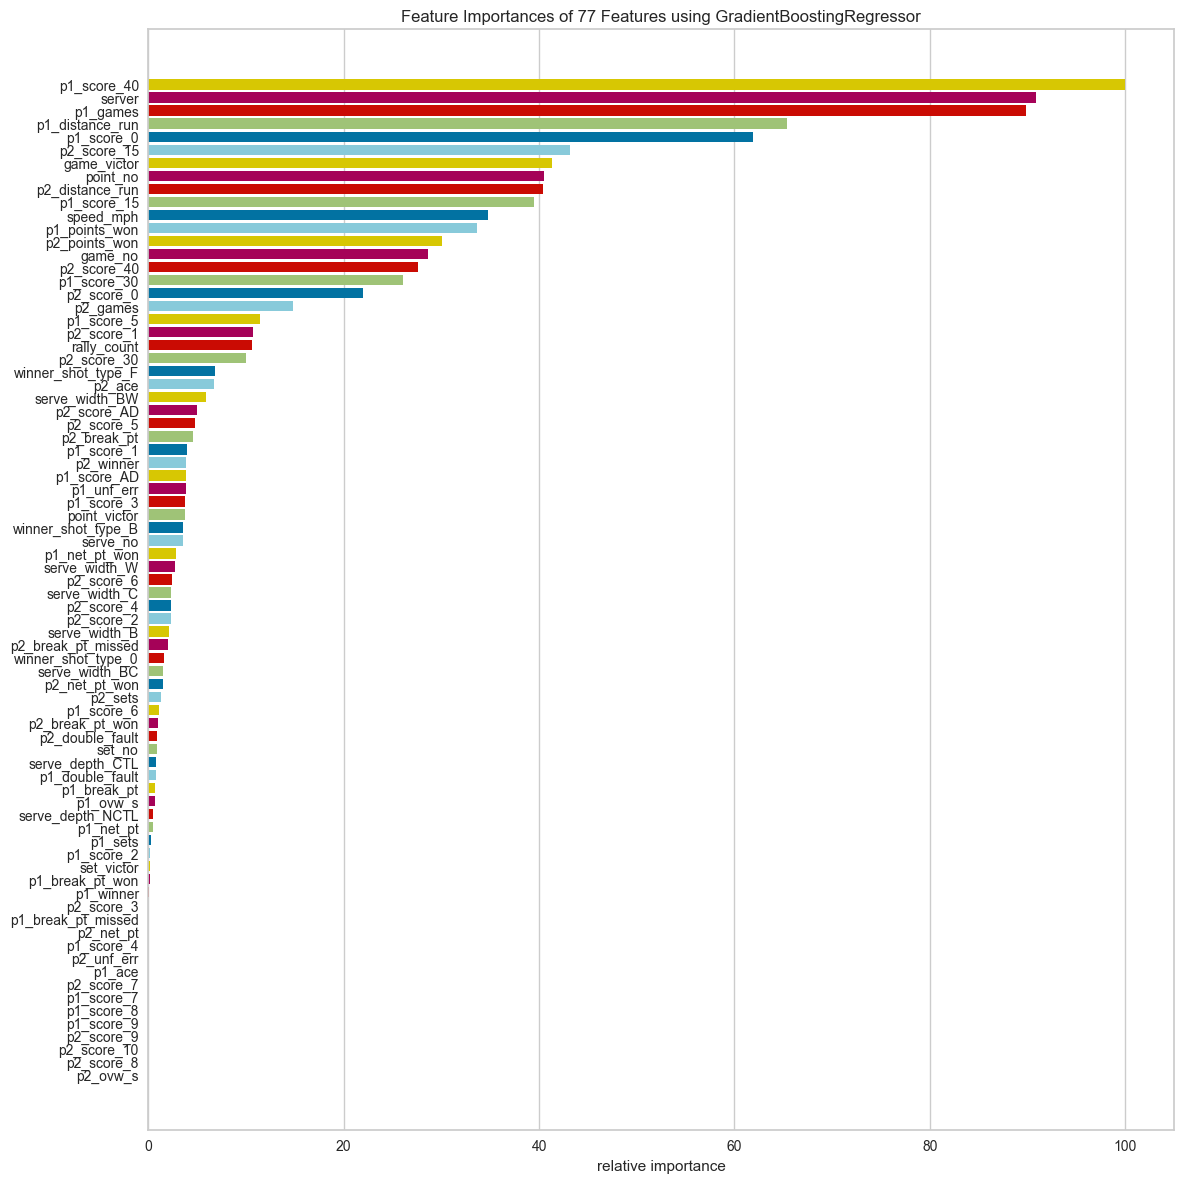

<Axes: title={'center': 'Feature Importances of 77 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [65]:
from yellowbrick.model_selection import FeatureImportances
plt.figure(figsize=(12, 12))
plt.title('FeatureImportances of features using GBDT model')
viz = FeatureImportances(gbdt_model)
viz.fit(tr_x1, tr_y1)
plt.savefig("yellowbrick要素重要性图.png")
viz.show()
#运用yellowbrick库 可视化 GBDT模型中各个特征的重要程度

In [66]:
tt1=pd.read_csv('tt.csv')
tt1

,features,classify
0,p1_score_0,p1_score
1,p1_score_1,p1_score
2,p1_score_15,p1_score
3,p1_score_2,p1_score
4,p1_score_3,p1_score
...,...,...
72,p2_distance_run,p2_distance_run
73,rally_count,rally_count
74,speed_mph,speed_mph
75,p1_ovw_s,p1_ovw_s


In [76]:
a = tt1.groupby('classify').sum()

a.T

classify,game_no,game_victor,p1_ace,p1_break_pt,p1_break_pt_missed,p1_break_pt_won,p1_distance_run,p1_double_fault,p1_games,p1_net_pt,...,point_victor,rally_count,serve_depth,serve_no,serve_width,server,set_no,set_victor,speed_mph,winner_shot_type
features,game_no,game_victor,p1_ace,p1_break_pt,p1_break_pt_missed,p1_break_pt_won,p1_distance_run,p1_double_fault,p1_games,p1_net_pt,...,point_victor,rally_count,serve_depth_CTLserve_depth_NCTL,serve_no,serve_width_Bserve_width_BCserve_width_BWserve...,server,set_no,set_victor,speed_mph,winner_shot_type_0winner_shot_type_Bwinner_sho...


In [75]:
a.to_csv("a.csv",index=None)

In [79]:

yellow_df = pd.DataFrame(tr_x1.values, columns=tr_x1.columns)

# 输出每个特征的YE值（绝对值）
features=[]
abs_mean_ye_values=[]
for i, feature in enumerate(X.columns):
    abs_mean_ye_value = np.abs(yellow_df.values[:, i]).mean()
    features.append(feature)
    abs_mean_ye_values.append(abs_mean_ye_value)

ye=pd.DataFrame(features,columns=['features'])
ye['ye_values']=abs_mean_ye_values
ye.to_csv("ye.csv",index=None)

In [80]:
ye

,features,ye_values
0,p1_score_0,0.289085
1,p1_score_1,0.007394
2,p1_score_15,0.234155
3,p1_score_2,0.006690
4,p1_score_3,0.006690
...,...,...
72,p2_distance_run,13.789418
73,rally_count,3.177113
74,speed_mph,111.901056
75,p1_ovw_s,0.057287


In [81]:
ye = pd.read_csv('ye.csv')
ye

,features,ye_values,classify
0,p1_score_0,0.289085,p1_score
1,p1_score_1,0.007394,p1_score
2,p1_score_15,0.234155,p1_score
3,p1_score_2,0.006690,p1_score
4,p1_score_3,0.006690,p1_score
...,...,...,...
72,p2_distance_run,13.789418,p2_distance_run
73,rally_count,3.177113,rally_count
74,speed_mph,111.901056,speed_mph
75,p1_ovw_s,0.057287,p1_ovw_s


In [83]:
a = ye.groupby('classify').sum()

del a['features']
a

,ye_values
classify,
game_no,5.749648
game_victor,0.228521
p1_ace,0.045070
p1_break_pt,0.045775
p1_break_pt_missed,0.030986
p1_break_pt_won,0.014789
p1_distance_run,13.984898
p1_double_fault,0.018662
p1_games,2.464085


In [84]:
tr_x1

,p1_score_0,p1_score_1,p1_score_15,p1_score_2,p1_score_3,p1_score_30,p1_score_4,p1_score_40,p1_score_5,p1_score_6,...,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,p1_ovw_s,p2_ovw_s
661,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2.954,2.122,1,125.0,0.0,0.0000
2243,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,24.521,35.198,5,112.0,0.0,0.0000
1928,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,6.968,15.750,1,113.0,0.0,0.0000
2136,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,5.370,3.547,1,127.0,0.0,0.6931
3433,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,12.452,15.289,3,92.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.000,0.000,1,123.0,0.0,0.0000
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,18.097,17.608,5,118.0,0.0,0.0000
2989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,51.025,44.729,0,101.0,0.0,0.0000
421,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,10.927,6.860,1,109.0,0.0,0.0000


In [127]:
df = pd.read_csv('Momentum.csv')
df.fillna(method='ffill',inplace=True)
df.reset_index(inplace=True,drop=True)
temp1=pd.get_dummies(df[['p1_score','p2_score']])
temp2=df[['set_no', 'game_no','point_no', 
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games','server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace','p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed','p2_break_pt_missed',
       'p1_distance_run', 'p2_distance_run','rally_count', 'speed_mph',
       'p1_ovw_s','p2_ovw_s','p1_momentum', 'p2_momentum']]
data=pd.concat([temp1,temp2],axis=1)
data.replace({True:1,False:0},inplace=True)
data['match_id'] = df['match_id']
data['p1_momentum_diff'] = data.groupby(['match_id'])['p1_momentum'].diff(1)
data['p2_momentum_diff'] = data.groupby(['match_id'])['p2_momentum'].diff(1)
data = data.fillna(value=0)
data.reset_index(inplace=True,drop=True)

In [87]:
data

,p1_score_0,p1_score_1,p1_score_15,p1_score_2,p1_score_3,p1_score_30,p1_score_4,p1_score_40,p1_score_5,p1_score_6,...,p2_distance_run,rally_count,speed_mph,p1_ovw_s,p2_ovw_s,p1_momentum,p2_momentum,match_id,p1_momentum_diff,p2_momentum_diff
0,1,0,0,0,0,0,0,0,0,0,...,7.840,2,95.0,0.0,0.0,0.09386,0.03120,2023-wimbledon-1301,0.00000,0.00000
1,1,0,0,0,0,0,0,0,0,0,...,7.094,1,118.0,0.0,0.0,0.18804,0.01290,2023-wimbledon-1301,0.09418,-0.01830
2,0,0,1,0,0,0,0,0,0,0,...,19.808,4,120.0,0.0,0.0,0.16994,0.03120,2023-wimbledon-1301,-0.01810,0.01830
3,0,0,1,0,0,0,0,0,0,0,...,75.631,13,130.0,0.0,0.0,0.26412,0.01290,2023-wimbledon-1301,0.09418,-0.01830
4,0,0,0,0,0,1,0,0,0,0,...,0.813,1,112.0,0.0,0.0,0.23252,0.07180,2023-wimbledon-1301,-0.03160,0.05890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,1,0,0,0,0,0,0,0,0,0,...,50.971,11,123.0,0.0,0.0,0.14334,0.06699,2023-wimbledon-1701,0.03838,-0.03877
7280,0,0,1,0,0,0,0,0,0,0,...,27.766,5,114.0,0.0,0.0,0.20224,0.06699,2023-wimbledon-1701,0.05890,0.00000
7281,0,0,0,0,0,1,0,0,0,0,...,18.328,4,124.0,0.0,0.0,0.22034,0.02230,2023-wimbledon-1701,0.01810,-0.04469
7282,0,0,0,0,0,1,0,0,0,0,...,10.537,1,130.0,0.0,0.0,0.20684,0.00400,2023-wimbledon-1701,-0.01350,-0.01830


In [ ]:
#对40个主要的未拆分指标的重要程度进行刻画

In [128]:
dev_list = ['2023-wimbledon-1701','2023-wimbledon-1601','2023-wimbledon-1501','2023-wimbledon-1503',
            '2023-wimbledon-1401','2023-wimbledon-1403','2023-wimbledon-1405','2023-wimbledon-1407',
            '2023-wimbledon-1301','2023-wimbledon-1303','2023-wimbledon-1305','2023-wimbledon-1307',
            '2023-wimbledon-1309','2023-wimbledon-1311','2023-wimbledon-1313','2023-wimbledon-1315']
dev_d = pd.DataFrame()
for n in dev_list:
    dev_d = pd.concat([dev_d, df[df['match_id'] == n].copy()],axis=0)
dev_d.columns

Index(['match_id', 'player1', 'player2', 'elapsed_time', 'set_no', 'game_no',
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score',
       'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault', 'p2_double_fault',
       'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won',
       'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won',
       'p2_break_pt_won', 'p1_break_pt_missed', 'p2_break_pt_missed',
       'p1_distance_run', 'p2_distance_run', 'rally_count', 'speed_mph',
       'p1_ovw_s', 'p2_ovw_s', 'p1_momentum', 'p2_momentum'],
      dtype='object')

In [130]:
vv=dev_d[['set_no', 'game_no', 
       'point_no', 'p1_sets', 'p2_sets', 'p1_games', 'p2_games', 'p1_score',
       'p2_score', 'server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace',
       'p1_winner', 'p2_winner', 'p1_double_fault',
       'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed',
       'p2_break_pt_missed', 'p1_distance_run', 'p2_distance_run',
       'rally_count', 'speed_mph', 'p1_ovw_s',
       'p2_ovw_s', 'p1_momentum', 'p2_momentum']]

In [131]:
vv

,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,...,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,p1_ovw_s,p2_ovw_s,p1_momentum,p2_momentum
6950,1,1,1,0,0,0,0,0,0,2,...,0,0,5.661,4.341,1,111.0,0.0,0.0,-0.0406,-0.05396
6951,1,1,2,0,0,0,0,0,15,2,...,0,0,18.502,22.307,4,126.0,0.0,0.0,-0.0360,-0.02926
6952,1,1,3,0,0,0,0,15,15,2,...,0,0,4.786,2.926,2,102.0,0.0,0.0,-0.0676,-0.02926
6953,1,1,4,0,0,0,0,30,15,2,...,0,0,4.907,4.209,1,120.0,0.0,0.0,0.0082,0.14718
6954,1,1,5,0,0,0,0,30,30,2,...,0,0,12.881,8.676,2,108.0,0.0,0.0,0.0444,0.10841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,3,10,194,0,2,4,5,40,30,2,...,1,0,7.172,7.117,1,122.0,0.0,0.0,0.0427,0.24148
3617,3,10,195,0,2,4,5,40,40,2,...,0,0,9.831,7.305,2,99.0,0.0,0.0,-0.0198,0.34891
3618,3,10,196,0,2,4,5,50,40,2,...,1,0,3.332,5.388,1,127.0,0.0,0.0,-0.1276,0.23458
3619,3,10,197,0,2,4,5,40,40,2,...,0,0,8.743,8.134,1,133.0,0.0,0.0,-0.1276,0.15798


In [132]:
vv['p1_momentum_diff1']=vv['p1_momentum'].diff(1)
vv['p1_momentum_diff2']=vv['p2_momentum'].diff(1)
vv=vv.dropna()

In [133]:
vv

,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,p1_score,p2_score,server,...,p1_distance_run,p2_distance_run,rally_count,speed_mph,p1_ovw_s,p2_ovw_s,p1_momentum,p2_momentum,p1_momentum_diff1,p1_momentum_diff2
6951,1,1,2,0,0,0,0,0,15,2,...,18.502,22.307,4,126.0,0.0,0.0,-0.0360,-0.02926,0.0046,0.02470
6952,1,1,3,0,0,0,0,15,15,2,...,4.786,2.926,2,102.0,0.0,0.0,-0.0676,-0.02926,-0.0316,0.00000
6953,1,1,4,0,0,0,0,30,15,2,...,4.907,4.209,1,120.0,0.0,0.0,0.0082,0.14718,0.0758,0.17644
6954,1,1,5,0,0,0,0,30,30,2,...,12.881,8.676,2,108.0,0.0,0.0,0.0444,0.10841,0.0362,-0.03877
6955,1,1,6,0,0,0,0,40,30,2,...,7.293,7.704,1,127.0,0.0,0.0,0.0398,0.14718,-0.0046,0.03877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,3,10,194,0,2,4,5,40,30,2,...,7.172,7.117,1,122.0,0.0,0.0,0.0427,0.24148,0.0000,-0.05890
3617,3,10,195,0,2,4,5,40,40,2,...,9.831,7.305,2,99.0,0.0,0.0,-0.0198,0.34891,-0.0625,0.10743
3618,3,10,196,0,2,4,5,50,40,2,...,3.332,5.388,1,127.0,0.0,0.0,-0.1276,0.23458,-0.1078,-0.11433
3619,3,10,197,0,2,4,5,40,40,2,...,8.743,8.134,1,133.0,0.0,0.0,-0.1276,0.15798,0.0000,-0.07660


In [140]:
# 分离X和Y
X = vv[['p1_score','p2_score',
'set_no', 'game_no','point_no', 
       'p1_sets', 'p2_sets', 'p1_games', 'p2_games','server', 'serve_no', 'point_victor', 'p1_points_won',
       'p2_points_won', 'game_victor', 'set_victor', 'p1_ace', 'p2_ace','p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err', 'p1_net_pt', 'p2_net_pt',
       'p1_net_pt_won', 'p2_net_pt_won', 'p1_break_pt', 'p2_break_pt',
       'p1_break_pt_won', 'p2_break_pt_won', 'p1_break_pt_missed','p2_break_pt_missed',
       'p1_distance_run', 'p2_distance_run','rally_count', 'speed_mph',
       'p1_ovw_s','p2_ovw_s']]


Y1 = vv['p1_momentum_diff1']
Y2 = vv['p1_momentum_diff2']

In [141]:
tr_x1,te_x1,tr_y1,te_y1=train_test_split(X,Y1,test_size=0.2,random_state=30)

In [142]:
tr_x1

,p1_score,p2_score,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,p2_games,server,...,p1_break_pt_won,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,p1_ovw_s,p2_ovw_s
270,30,0,4,8,271,2,1,3,4,1,...,0,0,0,0,4.901,6.558,0,90.0,0.0,0.0000
5876,30,40,3,7,170,2,0,4,2,2,...,0,0,0,0,9.016,10.575,1,117.0,0.0,0.0000
3486,0,15,1,12,64,0,0,5,6,1,...,0,0,0,0,8.726,9.195,3,78.0,0.0,0.0000
159,30,30,3,1,160,1,1,0,0,1,...,0,0,0,0,4.131,5.861,1,113.0,0.0,0.0000
569,15,0,2,5,69,0,1,2,2,2,...,0,0,0,0,5.370,3.547,1,127.0,0.0,0.6931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4352,0,0,2,1,66,1,0,0,0,2,...,0,0,0,0,21.771,15.095,2,95.0,0.0,0.0000
5715,0,0,1,2,9,0,0,1,0,2,...,0,0,0,0,11.495,8.964,3,105.0,0.0,0.0000
2600,50,40,2,2,98,0,1,0,1,1,...,0,0,0,0,1.165,0.936,0,101.0,0.0,0.0000
6677,0,0,2,7,89,1,0,4,2,2,...,0,0,0,0,21.127,13.610,4,115.0,0.0,0.0000


In [143]:
#GBDT回归模型
print("\nGBDT回归:")
# 构建GBDT回归模型
gbdt_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gbdt_model.fit(tr_x1, tr_y1)
y_pred = gbdt_model.predict(te_x1)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(tr_x1),tr_y1)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(gbdt_model.predict(te_x1),te_y1)))
print("平均绝对误差:",mean_absolute_error(te_y1, y_pred))
print("r2_score",r2_score(te_y1,y_pred))


GBDT回归:
训练集平均绝对百分比误差:21.757
测试集平均绝对百分比误差:9.206
平均绝对误差: 0.038010520436988014
r2_score 0.14747992537896693


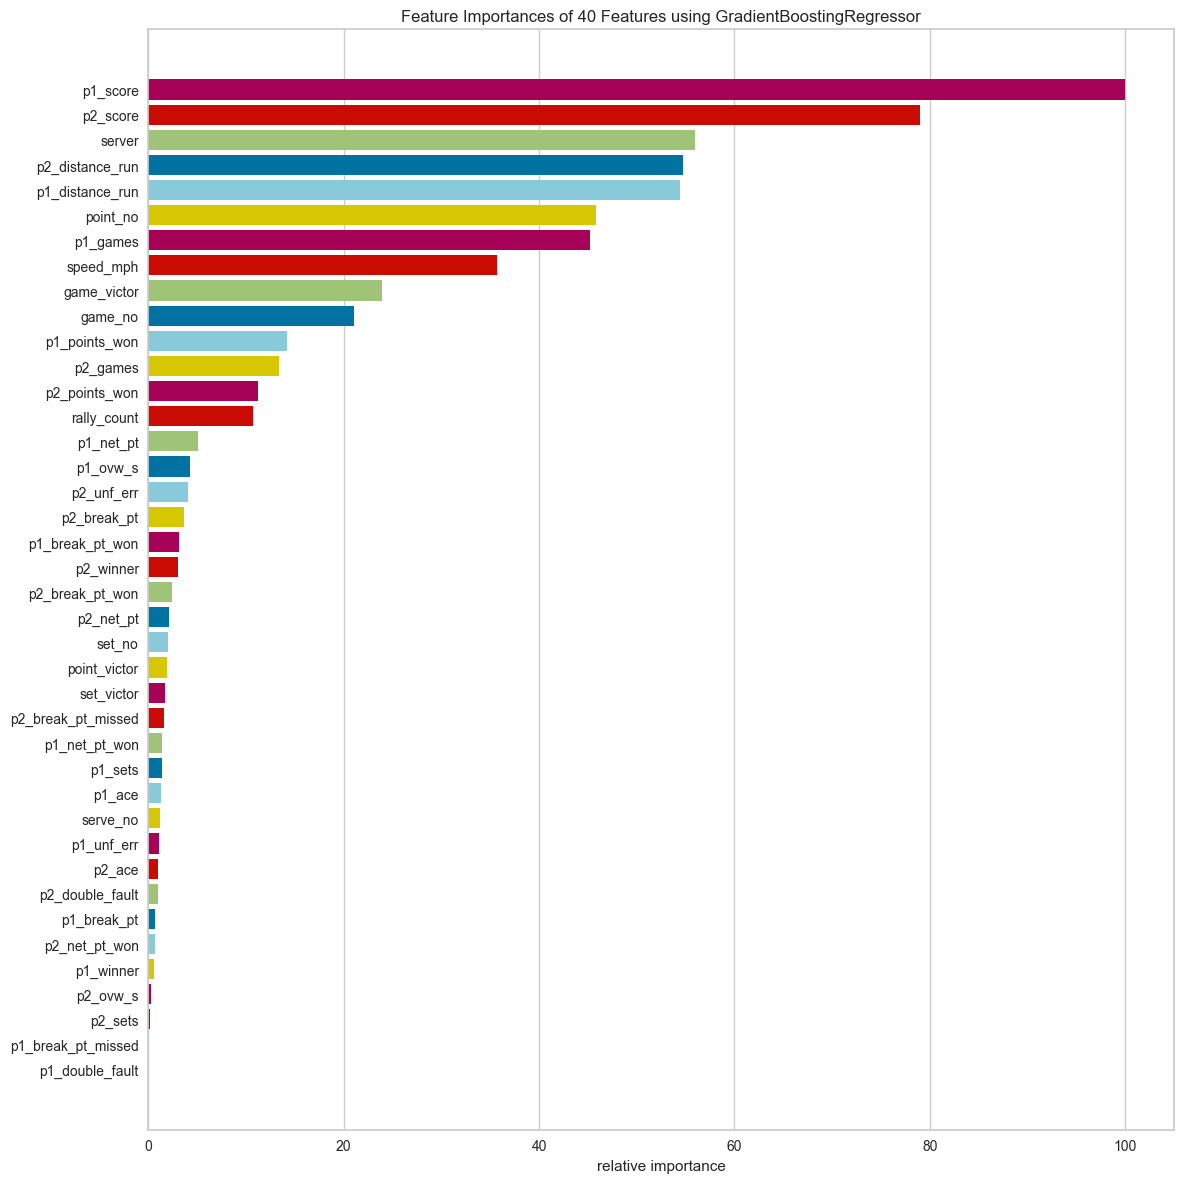

<Axes: title={'center': 'Feature Importances of 40 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [144]:
#运用yellowbrick库 可视化 GBDT模型中各个特征的重要程度
plt.figure(figsize=(12, 12))
plt.title('FeatureImportances of features using GBDT model')
viz = FeatureImportances(gbdt_model)
viz.fit(tr_x1, tr_y1)
plt.savefig("yellowbrick要素重要性图.png")
viz.show()

In [ ]:
#哪些因素存在相关关系？

In [ ]:
ta_1 = dev_data[['p1_ace', 'p1_winner', 'p1_break_pt_missed',  'p1_break_pt_won', 'p1_double_fault',
       'p1_break_pt', 'p1_net_pt_won', 'p1_net_pt', 'p1_unf_err']]
ta_2 = dev_data[['p2_ace', 'p2_winner', 'p2_break_pt_missed',  'p2_break_pt_won', 'p2_double_fault',
       'p2_break_pt', 'p2_net_pt_won', 'p2_net_pt', 'p2_unf_err']]

Y_y1 = dev_data['p1_momentum_diff']
Y_y2 = dev_data['p2_momentum_diff']
ta_x1,ts_x1,ta_y1,ts_y1=train_test_split(ta_1,Y_y1,test_size=0.2,random_state=30)
ta_x2,ts_x2,ta_y2,ts_y2=train_test_split(ta_2,Y_y2,test_size=0.2,random_state=30)

In [ ]:
plt.figure(figsize=(10, 10))
visualizer = Rank2D(algorithm='pearson') 
visualizer.fit(ta_x1, ta_y1)
visualizer.transform(ta_x1)
plt.savefig('Yellowbrick相关图1.png')
visualizer.show()